# A Holiday package Predicting Project for Vicky Bites Challenge

### 1) Problem statement.
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base.
One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering * Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information.
The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.
However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.
### 2) Data Collection.
The Dataset is collected from https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction


In [3]:
## importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("data/Travel.csv")

In [5]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [7]:
df.shape

(4888, 20)

In [8]:
### it literally has 4888 rows and 20 columns 

### Exploratory Data Analysis started here

In [9]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [12]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [13]:
df.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


In [11]:
categorical = ['ProdTaken', 'CityTier', 'PreferredPropertyStar', 'Passport',
        'OwnCar', 'PitchSatisfactionScore', 'TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
        'MaritalStatus', 'Designation']
numericals = ['CustomerID', 'Age', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups',
       'NumberOfTrips',
       'NumberOfChildrenVisiting', 'MonthlyIncome']

In [15]:
df[categorical] =  df[categorical].astype('object')

In [20]:
df[categorical].head()

,ProdTaken,CityTier,PreferredPropertyStar,Passport,OwnCar,PitchSatisfactionScore,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
0,1,3,3.0,1,1,2,Self Enquiry,Salaried,Female,Deluxe,Single,Manager
1,0,1,4.0,0,1,3,Company Invited,Salaried,Male,Deluxe,Divorced,Manager
2,1,1,3.0,1,0,3,Self Enquiry,Free Lancer,Male,Basic,Single,Executive
3,0,1,3.0,1,1,5,Company Invited,Salaried,Female,Basic,Divorced,Executive
4,0,1,4.0,0,1,5,Self Enquiry,Small Business,Male,Basic,Divorced,Executive


In [21]:
df.duplicated().any()

False

In [22]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [23]:
dupes = df.drop('CustomerID', axis=1).duplicated()
print(f'Total Duplicate Rows: {dupes.sum()} was present')

Total Duplicate Rows: 141 was present


In [27]:
df[categorical].describe().T

,count,unique,top,freq
ProdTaken,4888,2,0,3968
CityTier,4888,3,1,3190
PreferredPropertyStar,4862.0,3.0,3.0,2993.0
Passport,4888,2,0,3466
OwnCar,4888,2,1,3032
PitchSatisfactionScore,4888,5,3,1478
TypeofContact,4863,2,Self Enquiry,3444
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842


###  Lets find the catagories of each attributes 

In [29]:
for i in df[categorical].columns:
    x = df[i].unique()
    print(f'{i}: {x}')
    print('-----------')

ProdTaken: [1 0]
-----------
CityTier: [3 1 2]
-----------
PreferredPropertyStar: [3.0 4.0 5.0 nan]
-----------
Passport: [1 0]
-----------
OwnCar: [1 0]
-----------
PitchSatisfactionScore: [2 3 5 4 1]
-----------
TypeofContact: ['Self Enquiry' 'Company Invited' nan]
-----------
Occupation: ['Salaried' 'Free Lancer' 'Small Business' 'Large Business']
-----------
Gender: ['Female' 'Male' 'Fe Male']
-----------
ProductPitched: ['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King']
-----------
MaritalStatus: ['Single' 'Divorced' 'Married' 'Unmarried']
-----------
Designation: ['Manager' 'Executive' 'Senior Manager' 'AVP' 'VP']
-----------


In [30]:
df.replace('Fe Male','Female', inplace = True)

In [31]:
df.replace('Single', 'Unmarried',inplace=True)

In [32]:
for j in df[categorical].columns:
    x = df[j].unique()
    print(f'{j}: {x}')
    print('-----------')

ProdTaken: [1 0]
-----------
CityTier: [3 1 2]
-----------
PreferredPropertyStar: [3.0 4.0 5.0 nan]
-----------
Passport: [1 0]
-----------
OwnCar: [1 0]
-----------
PitchSatisfactionScore: [2 3 5 4 1]
-----------
TypeofContact: ['Self Enquiry' 'Company Invited' nan]
-----------
Occupation: ['Salaried' 'Free Lancer' 'Small Business' 'Large Business']
-----------
Gender: ['Female' 'Male']
-----------
ProductPitched: ['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King']
-----------
MaritalStatus: ['Unmarried' 'Divorced' 'Married']
-----------
Designation: ['Manager' 'Executive' 'Senior Manager' 'AVP' 'VP']
-----------


### Starting with the univariate analysis 

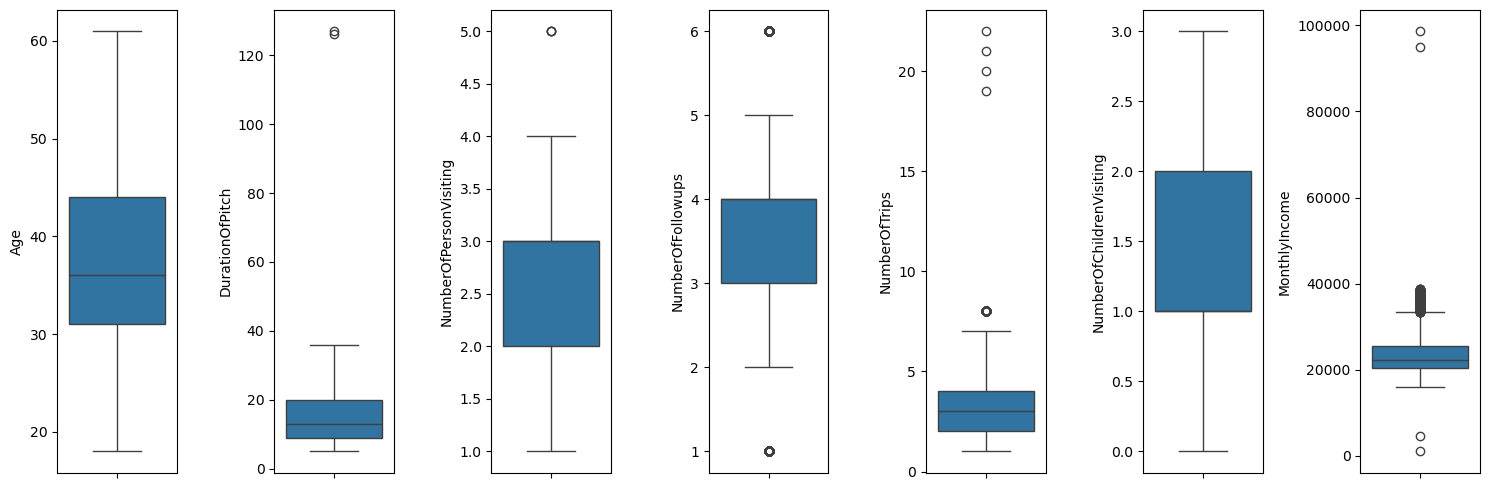

In [35]:
plt.figure(figsize=(15,5))
for i in range(1, len(numericals)):
    plt.subplot(1, 7, i)
    sns.boxplot(y=df[numericals[i]])
    plt.tight_layout()
plt.show()

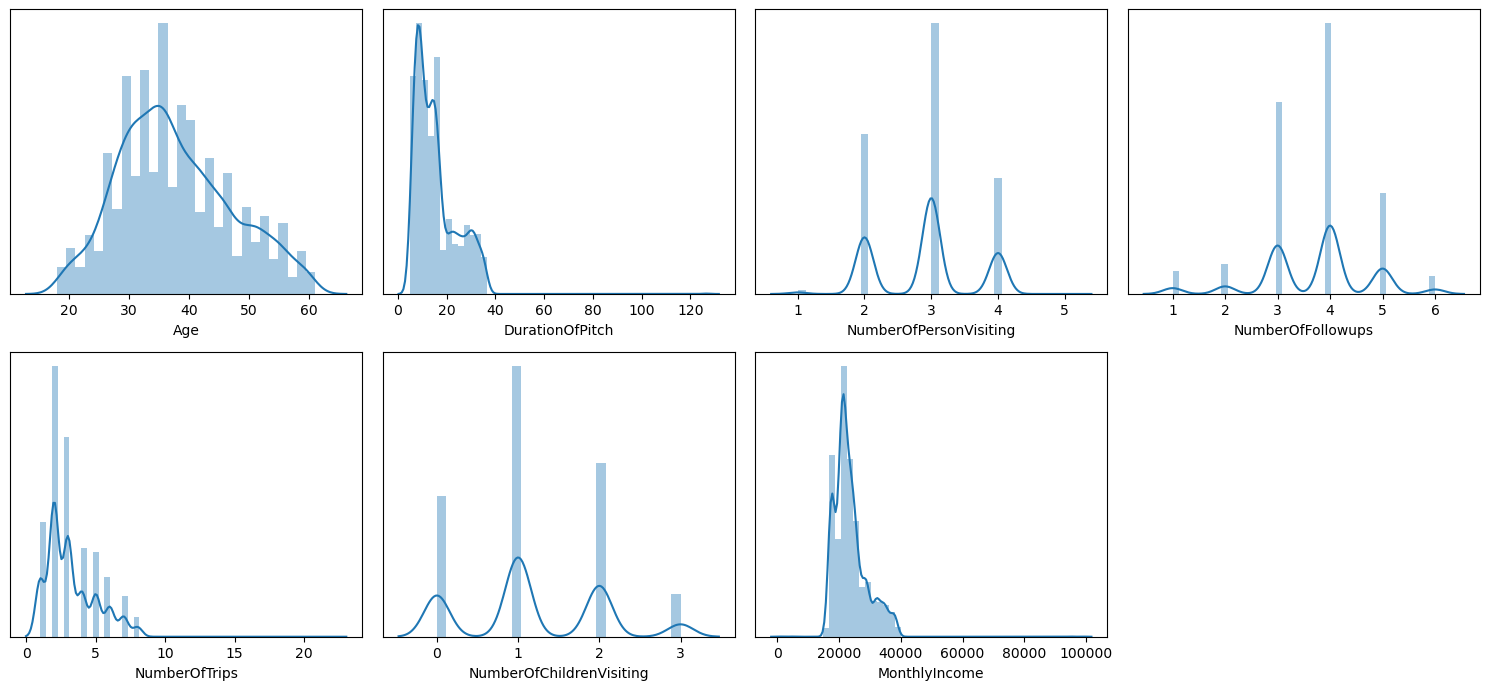

In [36]:
plt.figure(figsize=(15,10))
for i in range(1, len(numericals)):
    plt.subplot(3, 4, i)
    sns.distplot(df[numericals[i]])
    plt.ylabel('')
    plt.yticks([])
    plt.tight_layout()

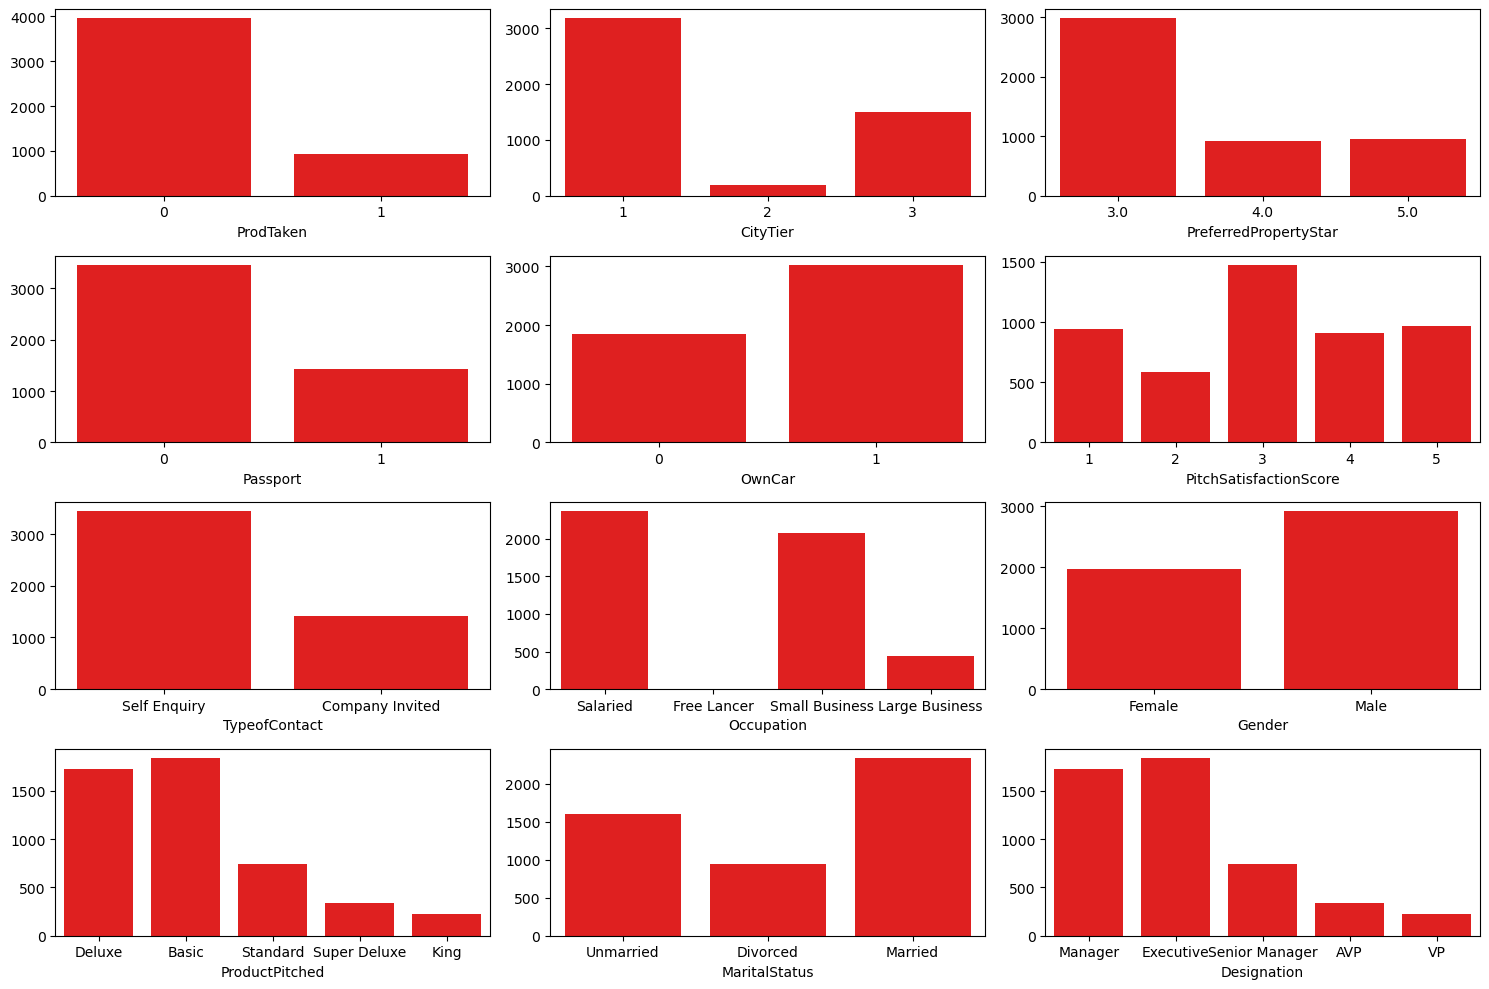

In [44]:
plt.figure(figsize=(15,10))
for i, col in enumerate(categorical):
    plt.subplot(4, 3, i+1)
    sns.countplot(x=df[col],color='red')
    plt.ylabel('')
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.tight_layout()

### multivariate analysis

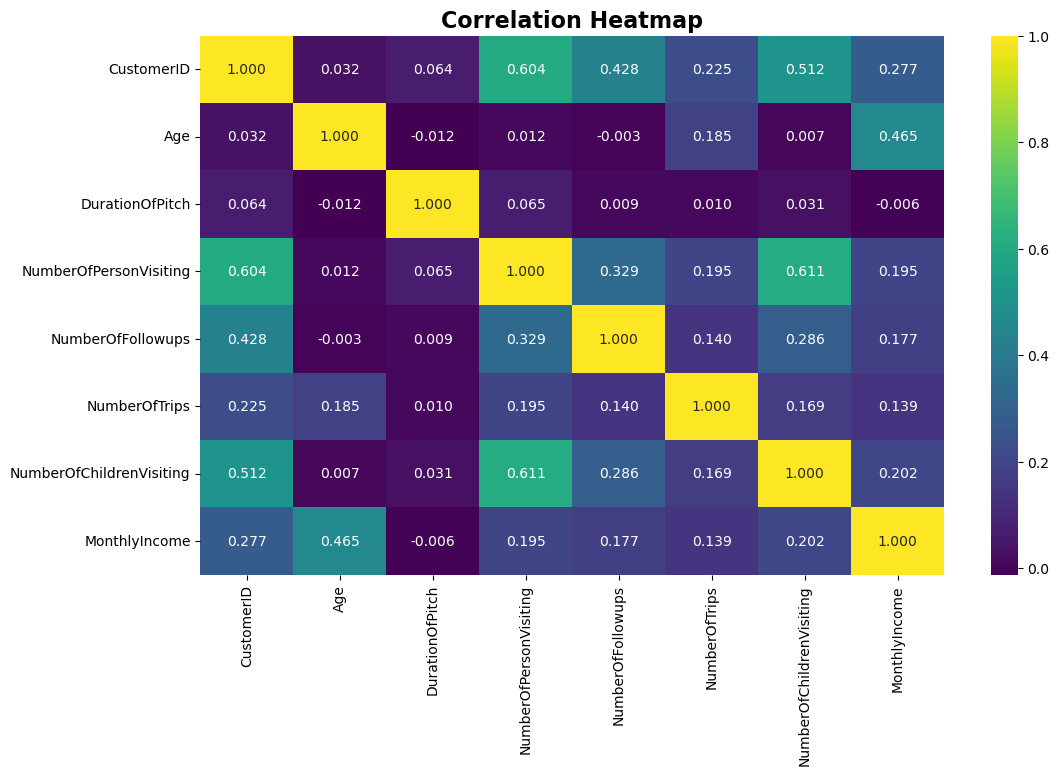

In [45]:
numeric_columns = df.select_dtypes(include='number')
plt.figure(figsize=(12,7))
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
sns.heatmap(numeric_columns.corr(), cmap='viridis', annot=True, fmt='.3f')
plt.show()

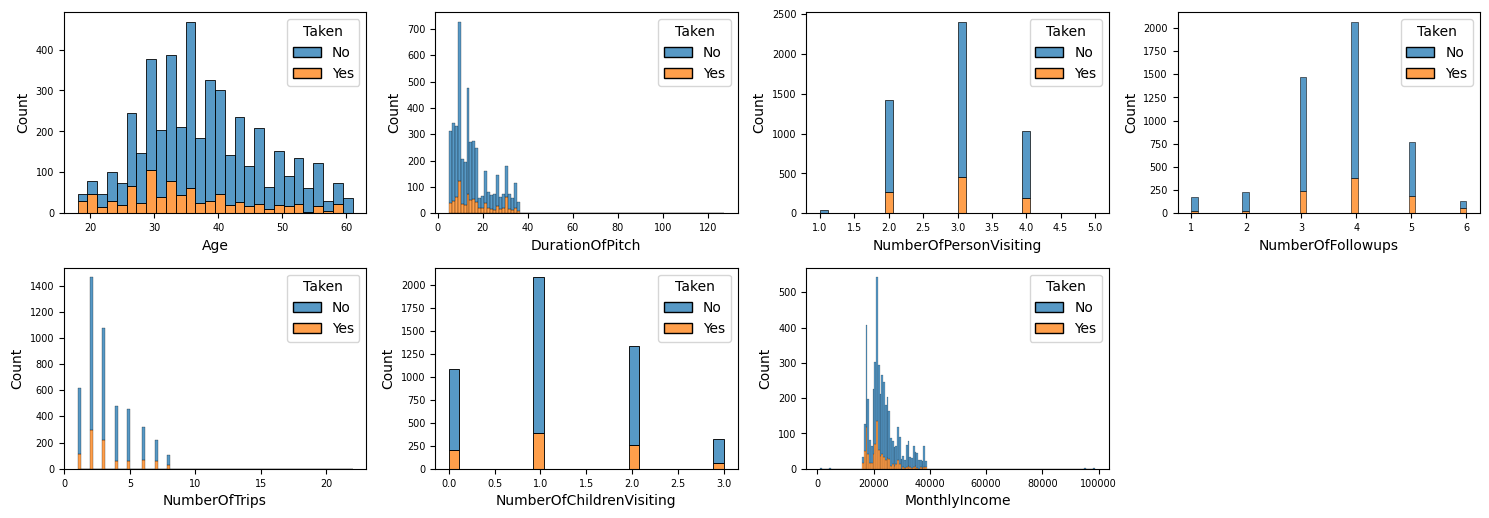

In [47]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numericals[1:]):
    plt.subplot(4, 4, i+1)
    plt.tick_params(axis='both', which='major', labelsize=7)
    sns.histplot(data=df, x=col, hue='ProdTaken', multiple='stack')
    
    legend = plt.gca().get_legend()
    legend.set_title('Taken')
    legend.get_texts()[0].set_text('No')
    legend.get_texts()[1].set_text('Yes')

plt.tight_layout()

plt.show()